In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import mlflow
import mlflow.sklearn
import mlflow.xgboost
from sklearn.metrics import f1_score

import pickle
import os

In [3]:
df = pd.read_csv("personality_dataset.csv")
df.head()

,personality_type,social_energy,alone_time_preference,talkativeness,deep_reflection,group_comfort,party_liking,listening_skill,empathy,creativity,...,spontaneity,adventurousness,reading_habit,sports_interest,online_social_usage,travel_desire,gadget_usage,work_style_collaborative,decision_speed,stress_handling
0,Extrovert,6.794295,3.854670,8.725446,2.515151,7.097368,8.588762,6.774799,6.430132,6.142968,...,4.853313,8.257134,5.270555,10.000000,9.154296,4.816422,9.191711,8.313590,8.032376,7.176905
1,Ambivert,6.378988,5.731157,7.029529,7.274493,4.111199,3.258248,5.550909,3.958179,6.149457,...,6.067201,6.289347,5.753165,5.334303,4.683781,4.725666,5.956141,5.890619,3.158988,3.423577
2,Ambivert,7.459421,6.322263,3.922269,4.622261,5.343276,7.452152,9.483990,6.127654,7.032017,...,5.524244,9.238784,5.250405,3.153540,5.000338,6.139166,6.033048,5.807500,4.571003,5.647480
3,Extrovert,6.159626,3.097837,6.019093,1.965440,7.837140,10.000000,9.436733,8.949684,8.923875,...,4.327018,8.489791,5.312617,8.379936,7.601946,6.370056,5.410145,6.671781,6.600233,5.870088
4,Introvert,5.568462,6.986722,3.913240,9.926161,1.650483,0.362298,7.470387,6.756837,9.507803,...,5.187689,3.167217,7.060235,2.333388,7.771569,5.534336,5.704598,5.832968,5.813099,3.758084


In [4]:
print(df.isnull().sum())

personality_type            0
social_energy               0
alone_time_preference       0
talkativeness               0
deep_reflection             0
group_comfort               0
party_liking                0
listening_skill             0
empathy                     0
creativity                  0
organization                0
leadership                  0
risk_taking                 0
public_speaking_comfort     0
curiosity                   0
routine_preference          0
excitement_seeking          0
friendliness                0
emotional_stability         0
planning                    0
spontaneity                 0
adventurousness             0
reading_habit               0
sports_interest             0
online_social_usage         0
travel_desire               0
gadget_usage                0
work_style_collaborative    0
decision_speed              0
stress_handling             0
dtype: int64


In [5]:
print(df['personality_type'].value_counts())

personality_type
Extrovert    6857
Ambivert     6573
Introvert    6570
Name: count, dtype: int64


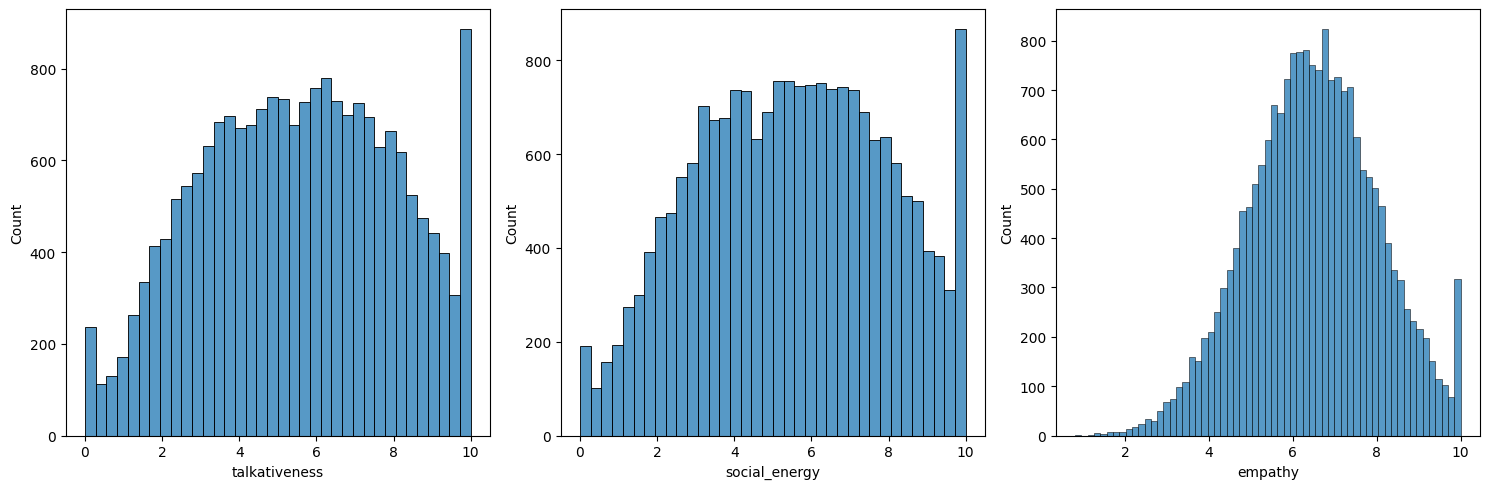

In [13]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 3, figsize=(15, 5))
 
 # Plotting the distribution of a few features
sns.histplot(df['talkativeness'], ax=axes[0])
sns.histplot(df['social_energy'], ax=axes[1])
sns.histplot(df['empathy'], ax=axes[2])
 
plt.tight_layout()
plt.show()

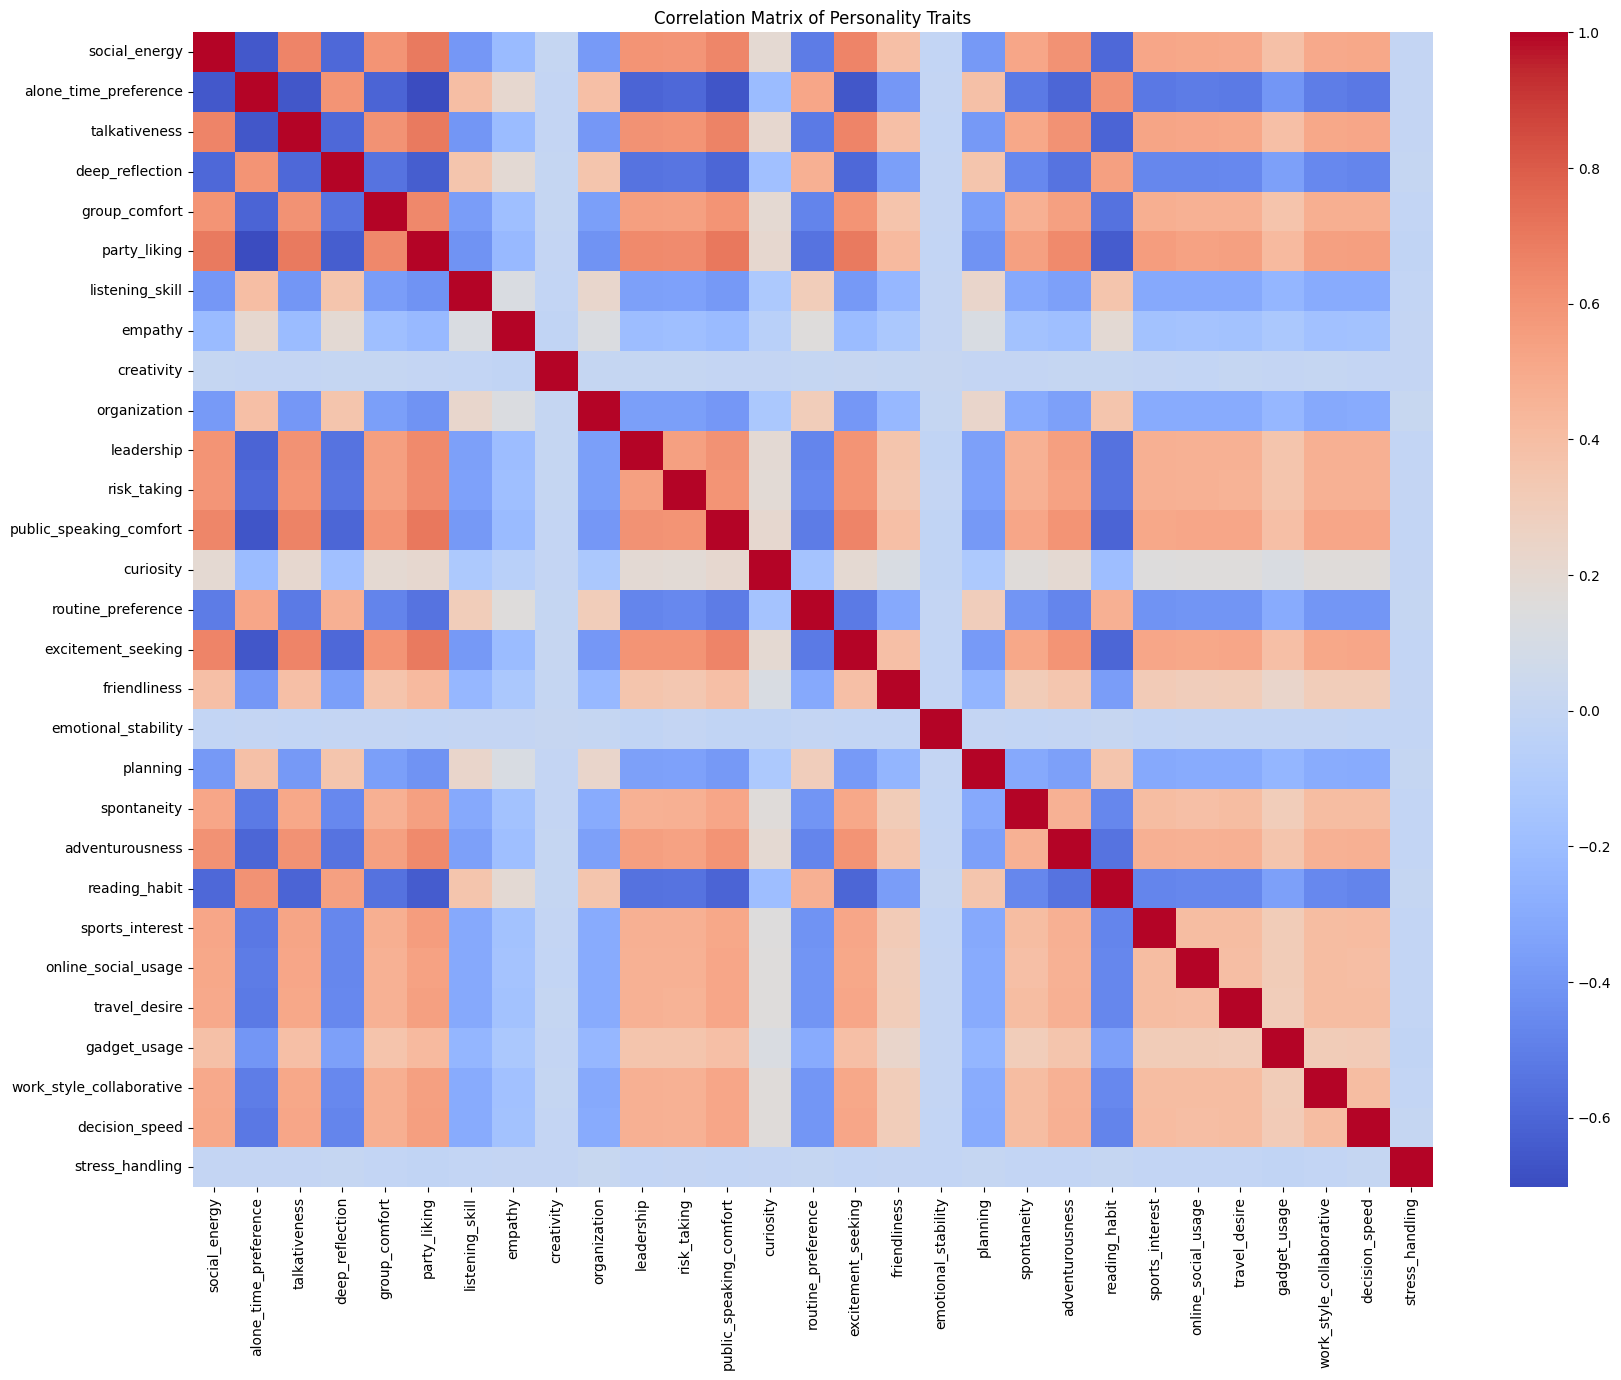

In [14]:
# Calculate the correlation matrix
corr_matrix = df.drop('personality_type', axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))
# Draw the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Personality Traits')
plt.show()


In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'personality_type' column
df['personality_type_encoded'] = le.fit_transform(df['personality_type'])

# You can see the mapping of original labels to new numbers
print("Mapping of labels to numbers:")
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")

# Display the first few rows with the new encoded column
print("\nDataFrame with encoded labels:")
print(df[['personality_type', 'personality_type_encoded']].head())

Mapping of labels to numbers:
Ambivert: 0
Extrovert: 1
Introvert: 2

DataFrame with encoded labels:
  personality_type  personality_type_encoded
0        Extrovert                         1
1         Ambivert                         0
2         Ambivert                         0
3        Extrovert                         1
4        Introvert                         2


In [18]:


# Separate your features (X) from your target (y)
X = df.drop(['personality_type', 'personality_type_encoded'], axis=1)
y = df['personality_type_encoded']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your features and transform them
X_scaled = scaler.fit_transform(X)

# X_scaled is now a NumPy array with your scaled features
# You can convert it back to a DataFrame if you like
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
 
print("Original data sample:")
print(X.head(1))
print("\nScaled data sample:")
print(X_scaled_df.head(1))

Original data sample:
   social_energy  alone_time_preference  talkativeness  deep_reflection  \
0       6.794295                3.85467       8.725446         2.515151   

   group_comfort  party_liking  listening_skill   empathy  creativity  \
0       7.097368      8.588762         6.774799  6.430132    6.142968   

   organization  ...  spontaneity  adventurousness  reading_habit  \
0           0.0  ...     4.853313         8.257134       5.270555   

   sports_interest  online_social_usage  travel_desire  gadget_usage  \
0             10.0             9.154296       4.816422      9.191711   

   work_style_collaborative  decision_speed  stress_handling  
0                   8.31359        8.032376         7.176905  

[1 rows x 29 columns]

Scaled data sample:
   social_energy  alone_time_preference  talkativeness  deep_reflection  \
0       0.520609              -0.641633       1.285998        -1.592481   

   group_comfort  party_liking  listening_skill   empathy  creativity  \
0 

In [21]:
# --- 1. Split the Data ---
# We use the scaled features (X_scaled) and encoded labels (y) from the previous step.
# stratify=y ensures the train and validation sets have the same proportion of labels.
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")



Training data shape: (16000, 29)
Validation data shape: (4000, 29)


In [23]:

# --- 2. Initialize and Train Models ---
print("\nTraining models...")

# RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
print("RandomForest training complete.")

 # XGBoost
 # use_label_encoder=False and eval_metric are set to align with modern XGBoost standards
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric= 'mlogloss')
xgb_model.fit(X_train, y_train)
print("XGBoost training complete.")
 
# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
print("Logistic Regression training complete.")
 
 



Training models...
RandomForest training complete.


/opt/miniconda3/envs/07-project/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:31:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost training complete.
Logistic Regression training complete.


In [24]:
# --- 3. Evaluate Models on the Validation Set ---
print("\n--- Evaluation Results ---")
 
# Make predictions
rf_preds = rf_model.predict(X_val)
xgb_preds = xgb_model.predict(X_val)
lr_preds = lr_model.predict(X_val)

# Print evaluation reports
print("\n--- Random Forest Classifier ---")
print(f"Accuracy: {accuracy_score(y_val, rf_preds):.4f}")
print(classification_report(y_val, rf_preds, target_names=le.classes_)) # Using le.classes_ for readable labels

print("\n--- XGBoost Classifier ---")
print(f"Accuracy: {accuracy_score(y_val, xgb_preds):.4f}")
print(classification_report(y_val, xgb_preds, target_names=le.classes_))

print("\n--- Logistic Regression ---")
print(f"Accuracy: {accuracy_score(y_val, lr_preds):.4f}")
print(classification_report(y_val, lr_preds, target_names=le.classes_))


--- Evaluation Results ---

--- Random Forest Classifier ---
Accuracy: 0.9958
              precision    recall  f1-score   support

    Ambivert       0.99      1.00      0.99      1315
   Extrovert       1.00      0.99      1.00      1371
   Introvert       1.00      1.00      1.00      1314

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


--- XGBoost Classifier ---
Accuracy: 0.9952
              precision    recall  f1-score   support

    Ambivert       0.99      1.00      0.99      1315
   Extrovert       1.00      0.99      1.00      1371
   Introvert       1.00      0.99      1.00      1314

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


--- Logistic Regression ---
Accuracy: 0.9980
              precision    recall  f1-score   support

    Ambivert 

In [26]:
# Set the experiment name.
mlflow.set_experiment("Personality_Prediction_Models")

# --- Re-using our split data from the previous step ---
# X_train, X_val, y_train, y_val are already defined

# 1. Experiment with RandomForest 
with mlflow.start_run(run_name="RandomForest_Run"):
    print("Training and tracking RandomForest...")

    # Define and log hyperparameters
    params = {"n_estimators": 100, "random_state": 42, "n_jobs": -1}
    mlflow.log_params(params)
    mlflow.set_tag("model_type", "RandomForestClassifier")

    # Train the model
    rf_model = RandomForestClassifier(**params)
    rf_model.fit(X_train, y_train)

    # Make predictions and evaluate
    rf_preds = rf_model.predict(X_val)
    accuracy = accuracy_score(y_val, rf_preds)
    f1 = f1_score(y_val, rf_preds, average="weighted")

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    print(f"RandomForest - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")

    # Log the model
    mlflow.sklearn.log_model(rf_model, "random_forest_model")




2025/07/10 23:39:36 INFO mlflow.tracking.fluent: Experiment with name 'Personality_Prediction_Models' does not exist. Creating a new experiment.


Training and tracking RandomForest...


2025/07/10 23:39:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


RandomForest - Accuracy: 0.9958, F1-Score: 0.9958


2025/07/10 23:39:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [27]:
# 2. Experiment with XGBoost
with mlflow.start_run(run_name="XGBoost_Run"):
    print("\nTraining and tracking XGBoost...")

    # Define and log hyperparameters
    params = {"random_state": 42, "use_label_encoder": False, "eval_metric": 'mlogloss'}
    mlflow.log_params(params)
    mlflow.set_tag("model_type", "XGBClassifier")

    # Train the model
    xgb_model = XGBClassifier(**params)
    xgb_model.fit(X_train, y_train)

    # Make predictions and evaluate
    xgb_preds = xgb_model.predict(X_val)
    accuracy = accuracy_score(y_val, xgb_preds)
    f1 = f1_score(y_val, xgb_preds, average="weighted")

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    print(f"XGBoost - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")

    # Log the model
    mlflow.xgboost.log_model(xgb_model, "xgboost_model")


Training and tracking XGBoost...


/opt/miniconda3/envs/07-project/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:39:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
2025/07/10 23:39:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


XGBoost - Accuracy: 0.9952, F1-Score: 0.9953


/opt/miniconda3/envs/07-project/lib/python3.11/site-packages/xgboost/sklearn.py:1028: UserWarning: [23:39:54] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)
2025/07/10 23:39:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [28]:

# --- 3. Experiment with Logistic Regression ---
with mlflow.start_run(run_name="LogisticRegression_Run"):
    print("\nTraining and tracking Logistic Regression...")

    # Define and log hyperparameters
    params = {"random_state": 42, "max_iter": 1000}
    mlflow.log_params(params)
    mlflow.set_tag("model_type", "LogisticRegression")

    # Train the model
    lr_model = LogisticRegression(**params)
    lr_model.fit(X_train, y_train)

    # Make predictions and evaluate
    lr_preds = lr_model.predict(X_val)
    accuracy = accuracy_score(y_val, lr_preds)
    f1 = f1_score(y_val, lr_preds, average="weighted")

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)
    print(f"Logistic Regression - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")
   # Log the model
    mlflow.sklearn.log_model(lr_model, "logistic_regression_model")
print("\nAll experiments tracked successfully!")

2025/07/10 23:40:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



Training and tracking Logistic Regression...
Logistic Regression - Accuracy: 0.9980, F1-Score: 0.9980


2025/07/10 23:40:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



All experiments tracked successfully!


In [31]:
# Save the Best Model and the Scaler
  
# We'll save our best model (Logistic Regression) and the scaler used to prepare the data
model_to_save = lr_model
scaler_to_save = scaler # This is the 'scaler' object from our feature engineering step
  
# Define the directory and file path
model_dir = 'models'
model_path = os.path.join(model_dir, 'logistic_reg_personality_model.bin')

# Create the 'models' directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

#Open the file in binary write mode and save the tuple (scaler, model)
print(f"\nSaving model and scaler to: {model_path}")
with open(model_path, 'wb') as f_out:
    pickle.dump((scaler_to_save, model_to_save), f_out)

print("Model saved successfully!")


Saving model and scaler to: models/logistic_reg_personality_model.bin
Model saved successfully!
